In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from scipy.stats import shapiro

In [8]:
df = pd.read_csv('diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# shapiro test on the glucose column
shapiro_test = stats.shapiro(df['Glucose'])
print(f'Shapiro-Wilk p-value: ',shapiro_test)

Shapiro-Wilk p-value:  ShapiroResult(statistic=0.9701038379391942, pvalue=1.9863474999979633e-11)


In [11]:
if shapiro_test.pvalue<0.05:
    print("The data is likely does not follow a normal distribution")
else:
    print("The data may be normally distributed , but the q-q plot can provide further insights.")

The data is likely does not follow a normal distribution


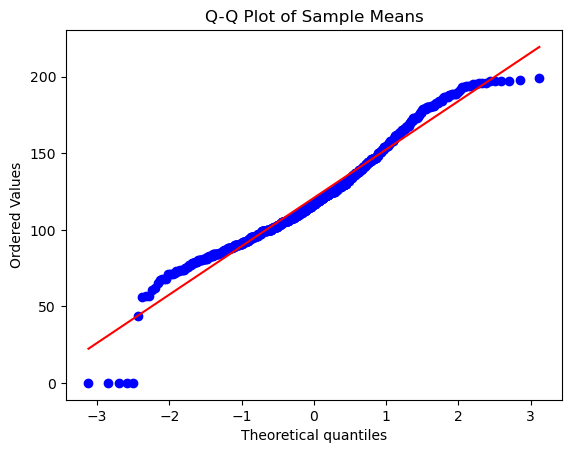

In [12]:
# Generate a Q-Q plot for the sample means
stats.probplot(df['Glucose'],dist="norm",plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.show()

In [13]:
# Central Limit Theorem
sample_means = []
n_samples = 100
sample_size = 30

In [14]:
for _ in range(n_samples):
    sample = df['Glucose'].sample(n = sample_size,replace=True)
    sample_means.append(sample.mean())

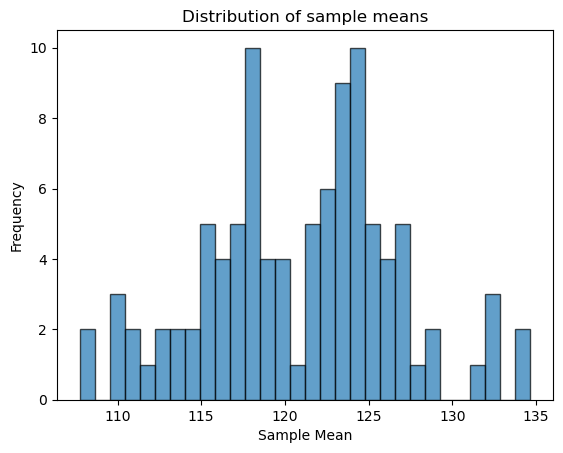

In [15]:
# Plot the distribution of sample means
plt.hist(sample_means,bins=30,edgecolor='k',alpha=0.7)
plt.title("Distribution of sample means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

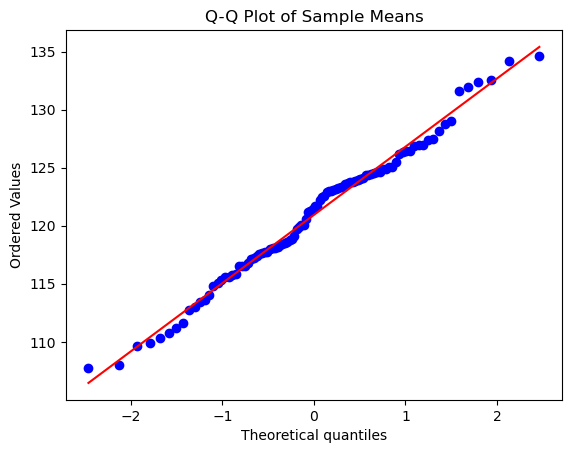

In [16]:
# Generate a Q-Q plot for the sample means 
stats.probplot(sample_means,dist="norm",plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.show()

In [17]:
# Perform the Shapiro-Wilk test on the sample means
shapiro_test = stats.shapiro(sample_means)
print("Shapiro-Wilk p-value: ",shapiro_test.pvalue)

Shapiro-Wilk p-value:  0.4305122127200527


In [19]:
# Interpret the result
if shapiro_test.pvalue < 0.5:
    print("The data likely does not follow a normal distribution")
else:
    print("The data may be normally distributed , but the q-q plot can provide further insights.")

The data likely does not follow a normal distribution
